<a href="https://colab.research.google.com/github/Bhuvanachandra-kusuma/PLANT-DISEASE-PREDICTION-USING-Convolutional-Neural-Networks/blob/main/Plant_disease_prediction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:

# configuring the path of Kaggle.json file

#moving the key to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#setup proper permissions
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:26<00:00, 238MB/s]
100% 2.04G/2.04G [00:26<00:00, 81.9MB/s]


In [4]:

!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [17]:

# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/plantvillage-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


IMPORTING THE DEPENDENCIES

In [58]:

import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
#Displaying the class names for the given dataset
print(os.listdir("plantvillage dataset"))

# Checking how many class folders exist inside the segmented dataset
print(len(os.listdir("plantvillage dataset/segmented")))
# Displaying the first 5 class names from the segmented dataset
print(os.listdir("plantvillage dataset/segmented")[:5])


# Checking how many class folders exist inside the color dataset
print(len(os.listdir("plantvillage dataset/color")))
# Displaying the first 5 class names from the color dataset
print(os.listdir("plantvillage dataset/color")[:5])

# Checking how many class folders exist inside the grayscale dataset
print(len(os.listdir("plantvillage dataset/grayscale")))
# Displaying the first 5 class names from the grayscale dataset
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'segmented', 'color']
38
['Potato___Late_blight', 'Soybean___healthy', 'Tomato___Leaf_Mold', 'Cherry_(including_sour)___healthy', 'Tomato___Target_Spot']
38
['Potato___Late_blight', 'Soybean___healthy', 'Tomato___Leaf_Mold', 'Cherry_(including_sour)___healthy', 'Tomato___Target_Spot']
38
['Potato___Late_blight', 'Soybean___healthy', 'Tomato___Leaf_Mold', 'Cherry_(including_sour)___healthy', 'Tomato___Target_Spot']


CLASSES = 38

In [20]:
# Count how many images are present in the 'Blueberry___healthy' class folder
print(len(os.listdir("/content/plantvillage dataset/color/Blueberry___healthy")))


# Display the first 5 image filenames from the 'Blueberry___healthy' folder
print(os.listdir("/content/plantvillage dataset/color/Blueberry___healthy")[:5])

1502
['e996d5f6-3bba-4c04-870f-dfe2ad0403df___RS_HL 0722.JPG', '2c206d37-2eb2-4445-9e66-d50de4bdcc36___RS_HL 0634.JPG', 'e9d2912b-1dc4-41a8-b60c-a5065f01e15f___RS_HL 5033.JPG', 'c7ce4edb-e85a-4442-82e8-837a107f480f___RS_HL 0568.JPG', 'e3aa97af-12eb-4f5e-8205-40e4535172e0___RS_HL 5409.JPG']


DATA PREPROCESSING


In [21]:
#Path to the Plantvillage color dataset
color_dataset_dir = 'plantvillage dataset/color'

(256, 256, 3)


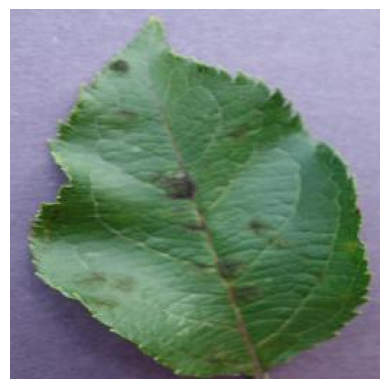

In [22]:
# Path to a sample image from the PlantVillage color dataset
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the image from the specified path using matplotlib
img = mpimg.imread(image_path)

# Print the shape of the image (height, width, channels)
print(img.shape)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()


In [23]:
# Image size to which all input images will be resized (224x224 is common for CNNs like VGG, ResNet, etc.)
img_size = 224

# Number of images to process in one batch during training
batch_size = 32


In [24]:
# Path to a sample image from the PlantVillage color dataset
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the image as a NumPy array using matplotlib
img = mpimg.imread(image_path)

# Print the raw pixel data of the image
print(img)


[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


TRAIN AND TEST DATA SPLIT

In [25]:
# Image Data Generator for preprocessing and splitting the dataset
data_generator = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values: converts [0–255] → [0–1]
    validation_split=0.2  # Reserve 20% of the dataset for validation
)


In [64]:
# Load training images from the PlantVillage color dataset
train_generator = data_generator.flow_from_directory(
    directory=color_dataset_dir,             # Use the dataset path variable
    target_size=(img_size, img_size),        # Resize images to 224×224
    batch_size=batch_size,                  # Number of images per batch
    class_mode='categorical',               # Multi-class classification
    subset='training',                      # Use 80% of the data for training
    shuffle=True                            # Shuffle to improve training
)

import json

# Save class indices for later use (for Streamlit app)
with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)


Found 43456 images belonging to 38 classes.


In [34]:
# Load validation images (remaining 20% of the dataset)
validation_generator = data_generator.flow_from_directory(
    directory=color_dataset_dir,             # Same dataset path variable
    target_size=(img_size, img_size),        # Resize images to 224×224
    batch_size=batch_size,                  # Same batch size
    class_mode='categorical',               # Multi-class labels
    subset='validation',                    # Use 20% for validation
    shuffle=False                           # No shuffling needed for validation
)


Found 10849 images belonging to 38 classes.


In [35]:
# Print the label-to-index mapping for all classes
print("Classes found:", train_generator.class_indices)

# Store the number of classes for model building
num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)


Classes found: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_bligh

In [36]:
def build_simple_cnn(input_shape=(224, 224, 3), n_classes=10):
    """
    Builds a simple convolutional neural network.
    You can replace this with a pretrained model (transfer learning) later.
    """
    inp = layers.Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 2
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # Block 3
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # Block 4
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.35)(x)

    # Classification head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(n_classes, activation='softmax')(x)

    model = models.Model(inputs=inp, outputs=out, name='simple_cnn_plantvillage')
    return model

In [37]:

# Create model
model = build_simple_cnn(input_shape=(img_size, img_size, 3), n_classes=num_classes)
model.summary()

Model: "simple_cnn_plantvillage"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,918 (1.78 MB)

 Trainable params: 465,446 (1.78 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [38]:
# Compile model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


TRAINING THE MODEL


In [39]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 133s 87ms/step - accuracy: 0.5462 - loss: 1.6790 - val_accuracy: 0.6956 - val_loss: 1.1337
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 127s 84ms/step - accuracy: 0.8195 - loss: 0.5787 - val_accuracy: 0.6648 - val_loss: 1.2881
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 114s 84ms/step - accuracy: 0.8870 - loss: 0.3547 - val_accuracy: 0.8641 - val_loss: 0.4415
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 114s 84ms/step - accuracy: 0.9175 - loss: 0.2545 - val_accuracy: 0.8544 - val_loss: 0.4999
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 113s 83ms/step - accuracy: 0.9333 - loss: 0.2084 - val_accuracy: 0.9219 - val_loss: 0.2472


In [40]:
history.history['loss']
history.history['val_loss']
history.history['accuracy']
history.history['val_accuracy']


[0.6956120729446411,
 0.6648229956626892,
 0.8641223907470703,
 0.8543510437011719,
 0.9219210743904114]

In [41]:
print("Total training images:", train_generator.samples)
print("Total validation images:", validation_generator.samples)


Total training images: 43456
Total validation images: 10849


EVALUATING THE MODEL

In [42]:
# Evaluate the model on validation data
loss, accuracy = model.evaluate(validation_generator)

# Print accuracy in percentage
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


340/340 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.9064 - loss: 0.2834
Validation Accuracy: 92.19%


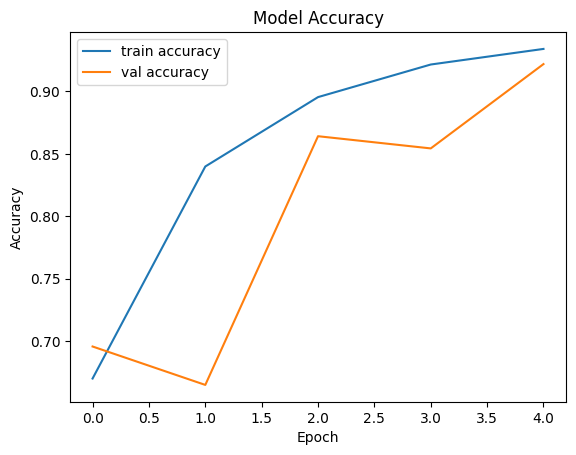

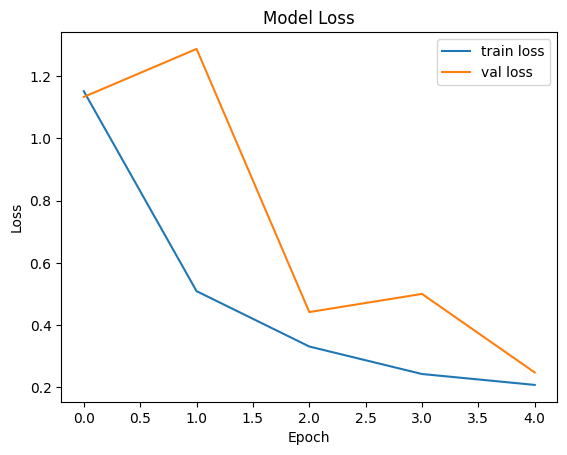

In [43]:
# PLOTTING TRAINING AND VALIDATION ACCURACY VALUES

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [54]:
# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(224, 224)): #loads image, resize the image, normalizes the image, prepares it for model input
    # Load the image from disk
    img = Image.open(image_path)

    # Resize the image to the input size expected by the model
    img = img.resize(target_size)

    # Convert image to NumPy array (H × W × 3)
    img_array = np.array(img)

    # Normalize pixel values from [0–255] to [0–1]
    img_array = img_array.astype('float32') / 255.0

    # Add a batch dimension: (224,224,3) → (1,224,224,3)
    img_array = np.expand_dims(img_array, axis=0)

    # Return the preprocessed image
    return img_array


# Function to predict the class of a given image
def predict_image_class(model, image_path, class_indices):

    # Reverse the dictionary: {class_name: index} → {index: class_name}
    # This allows us to get class names using predicted index
    index_to_class = {v: k for k, v in class_indices.items()}

    # Load + preprocess the image using the previous function
    img = load_and_preprocess_image(image_path)

    # Model prediction: returns probabilities for each class
    predictions = model.predict(img)

    # Get the index with highest probability
    predicted_index = np.argmax(predictions, axis=1)[0]

    # Convert class index → class name
    predicted_class_name = index_to_class[predicted_index]

    # Return the final predicted class name
    return predicted_class_name


Enter the full path of the image to detect the plant disease:
/content/plantvillage dataset/color/Orange___Haunglongbing_(Citrus_greening)/0022b959-3cf3-4e3a-9ed2-94623183c7fb___CREC_HLB 5510.JPG


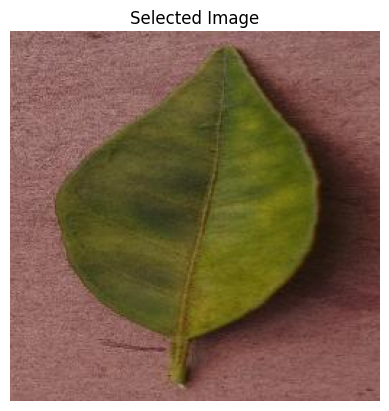

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

🌿 Predicted Plant Disease Class: Orange___Haunglongbing_(Citrus_greening)


In [57]:
# Ask the user for the image path
# This allows you to input any image path at runtime
image_path = input("Enter the full path of the image to detect the plant disease:\n")

try:
    # Load the image just to display it before prediction
    img_show = Image.open(image_path)

    # Display the selected image for verification
    plt.imshow(img_show)
    plt.title("Selected Image")
    plt.axis('off')
    plt.show()

    # Directly use your existing function to predict the class
    # No need to reverse dictionaries here — your function already does it
    predicted_class = predict_image_class(model, image_path, train_generator.class_indices)

    # Display the predicted class
    print("\n🌿 Predicted Plant Disease Class:", predicted_class)

except FileNotFoundError:
    # If the user enters a wrong or non-existing path, handle it gracefully
    print("\n❌ ERROR: The image path you entered does not exist. Please check the path and try again.")
